# Instalaciones

In [ ]:
!pip install pydicom
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48.4 MB 1.3 MB/s 


In [ ]:
!git clone https://gist.github.com/ReemRashwan/8c92086d3104d01978a16e05ca93a165

Cloning into '8c92086d3104d01978a16e05ca93a165'...
remote: Enumerating objects: 12, done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 12
Unpacking objects: 100% (12/12), done.


# Librerías

In [ ]:
#otros
import os
import re
import cv2
import shutil
import pickle
from glob import glob

#basicos
import numpy as np
import pandas as pd

#visualización
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

#dicom
import pydicom as dicom

#mhd
import SimpleITK as sitk


# Funciones auxiliares

In [ ]:
def to_float(x):
  ''' Objetivo: .
  ---------------------------------------------------------------------
  Input: .
  Output: .
  '''
 
  elem=x.split(sep=' ')

  if len(elem)>3:
    for item in elem:
      if item =='':
        elem.remove('')

  try:
    out=list(map(float, elem))
  except:
    out=np.nan
  return out


# Importar dataset

In [ ]:
COLAB = True

In [ ]:
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


## Dicom

In [ ]:
df_training_dcm=pickle.load(open("/content/drive/MyDrive/Capstone/PROSTATEX_dataset/pickles/df_training_dcm.pickle","rb"))

In [ ]:
df_training_dcm.head()

,ProxID,fid,pos_x,ijk,DCMSerNum,s_number,path_dcm,Name,pos_y,zone,ClinSig
0,ProstateX-0000,1,25.7457 31.8707 -38.511,36 72 9,7,7,/content/drive/MyDrive/Capstone/PROSTATEX_data...,ep2d_diff_tra_DYNDIST_ADC0,25.7457 31.8707 -38.511,PZ,True
1,ProstateX-0000,1,25.7457 31.8707 -38.511,36 72 9,6,6,/content/drive/MyDrive/Capstone/PROSTATEX_data...,ep2d_diff_tra_DYNDIST0,25.7457 31.8707 -38.511,PZ,True
2,ProstateX-0000,1,25.7457 31.8707 -38.511,36 72 9,6,6,/content/drive/MyDrive/Capstone/PROSTATEX_data...,ep2d_diff_tra_DYNDIST1,25.7457 31.8707 -38.511,PZ,True
3,ProstateX-0000,1,25.7457 31.8707 -38.511,36 72 9,6,6,/content/drive/MyDrive/Capstone/PROSTATEX_data...,ep2d_diff_tra_DYNDIST2,25.7457 31.8707 -38.511,PZ,True
4,ProstateX-0000,1,25.7457 31.8707 -38.511,36 72 9,8,8,/content/drive/MyDrive/Capstone/PROSTATEX_data...,ep2d_diff_tra_DYNDISTCALC_BVAL0,25.7457 31.8707 -38.511,PZ,True


## Mhd

In [ ]:
df_training_mhd=pickle.load(open("/content/drive/MyDrive/Capstone/PROSTATEX_dataset/pickles/df_training_mhd.pickle","rb"))

In [ ]:
df_training_mhd.head()

,ProxID,fid,pos_x,ijk,file,path,pos_y,zone,ClinSig
0,ProstateX-0000,1,25.7457 31.8707 -38.511,56 75 7,ProstateX-0000-Ktrans.mhd,/content/drive/MyDrive/Capstone/PROSTATEX_data...,25.7457 31.8707 -38.511,PZ,True
1,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,51 61 6,ProstateX-0001-Ktrans.mhd,/content/drive/MyDrive/Capstone/PROSTATEX_data...,-40.5367071921656 29.320722668457 -16.70766907...,AS,False
2,ProstateX-0002,1,-27.0102 41.5467 -26.0469,52 73 11,ProstateX-0002-Ktrans.mhd,/content/drive/MyDrive/Capstone/PROSTATEX_data...,-27.0102 41.5467 -26.0469,PZ,True
3,ProstateX-0002,2,-2.058 38.6752 -34.6104,68 72 8,ProstateX-0002-Ktrans.mhd,/content/drive/MyDrive/Capstone/PROSTATEX_data...,-2.058 38.6752 -34.6104,PZ,False
4,ProstateX-0003,1,22.1495 31.2717 -2.45933,80 69 10,ProstateX-0003-Ktrans.mhd,/content/drive/MyDrive/Capstone/PROSTATEX_data...,22.1495 31.2717 -2.45933,TZ,False


# Limpieza del dataset

## Limpieza y organización

Se realiza la unión de los dos dataframes.

In [ ]:
df_training_dcm=df_training_dcm.drop(columns='s_number')

In [ ]:
df_training_dcm.head()

,ProxID,fid,pos_x,ijk,DCMSerNum,path_dcm,Name,pos_y,zone,ClinSig
0,ProstateX-0000,1,25.7457 31.8707 -38.511,36 72 9,7,/content/drive/MyDrive/Capstone/PROSTATEX_data...,ep2d_diff_tra_DYNDIST_ADC0,25.7457 31.8707 -38.511,PZ,True
1,ProstateX-0000,1,25.7457 31.8707 -38.511,36 72 9,6,/content/drive/MyDrive/Capstone/PROSTATEX_data...,ep2d_diff_tra_DYNDIST0,25.7457 31.8707 -38.511,PZ,True
2,ProstateX-0000,1,25.7457 31.8707 -38.511,36 72 9,6,/content/drive/MyDrive/Capstone/PROSTATEX_data...,ep2d_diff_tra_DYNDIST1,25.7457 31.8707 -38.511,PZ,True
3,ProstateX-0000,1,25.7457 31.8707 -38.511,36 72 9,6,/content/drive/MyDrive/Capstone/PROSTATEX_data...,ep2d_diff_tra_DYNDIST2,25.7457 31.8707 -38.511,PZ,True
4,ProstateX-0000,1,25.7457 31.8707 -38.511,36 72 9,8,/content/drive/MyDrive/Capstone/PROSTATEX_data...,ep2d_diff_tra_DYNDISTCALC_BVAL0,25.7457 31.8707 -38.511,PZ,True


In [ ]:
df_training_dcm.shape

(4071, 10)

Se eliminan las mayúsculas iniciales presentes en los nombres de la variables

In [ ]:
df_training_dcm=df_training_dcm.rename(columns={'ProxID':'proxID',
                                                'DCMSerNum':'dcmSerNum',
                                                'Name':'name',
                                                'ClinSig':'clinSig'})

df_training_mhd=df_training_mhd.rename(columns={'ProxID':'proxID',
                                                'ClinSig':'clinSig',
                                                'path':'path_dcm'})

In [ ]:
df_training_dcm.keys()

Index(['proxID', 'fid', 'pos_x', 'ijk', 'dcmSerNum', 'path_dcm', 'name',
       'pos_y', 'zone', 'clinSig'],
      dtype='object')

In [ ]:
df_training_mhd.keys()

Index(['proxID', 'fid', 'pos_x', 'ijk', 'file', 'path_dcm', 'pos_y', 'zone',
       'clinSig'],
      dtype='object')

Para unir los dataframes se debe asignar un número de serie a las imágenes de tipo ktrans. Para evitar que se repita algún número asignado a una serie, se realiza la búsqueda del número máximo de serie presente en la variable __DCMSerNum__.

In [ ]:
max(list(df_training_dcm.sort_values(by='dcmSerNum', ascending=True)['dcmSerNum'].value_counts().reset_index()['index']))

117

Se asigna el nñumero 188 a todas las imágenes de tipo ktrans.

In [ ]:
df_training_mhd=df_training_mhd.assign(dcmSerNum=188,
                                       name='ktrans').drop(columns='file')
df_training_mhd.head()

,proxID,fid,pos_x,ijk,path_dcm,pos_y,zone,clinSig,dcmSerNum,name
0,ProstateX-0000,1,25.7457 31.8707 -38.511,56 75 7,/content/drive/MyDrive/Capstone/PROSTATEX_data...,25.7457 31.8707 -38.511,PZ,True,188,ktrans
1,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,51 61 6,/content/drive/MyDrive/Capstone/PROSTATEX_data...,-40.5367071921656 29.320722668457 -16.70766907...,AS,False,188,ktrans
2,ProstateX-0002,1,-27.0102 41.5467 -26.0469,52 73 11,/content/drive/MyDrive/Capstone/PROSTATEX_data...,-27.0102 41.5467 -26.0469,PZ,True,188,ktrans
3,ProstateX-0002,2,-2.058 38.6752 -34.6104,68 72 8,/content/drive/MyDrive/Capstone/PROSTATEX_data...,-2.058 38.6752 -34.6104,PZ,False,188,ktrans
4,ProstateX-0003,1,22.1495 31.2717 -2.45933,80 69 10,/content/drive/MyDrive/Capstone/PROSTATEX_data...,22.1495 31.2717 -2.45933,TZ,False,188,ktrans


In [ ]:
df_training_mhd.shape

(343, 10)

In [ ]:
df_tr_f=pd.concat([df_training_dcm,df_training_mhd])

In [ ]:
df_tr_f=df_tr_f.sort_values(by='proxID').reset_index(drop=True)
df_tr_f.head()

,proxID,fid,pos_x,ijk,dcmSerNum,path_dcm,name,pos_y,zone,clinSig
0,ProstateX-0000,1,25.7457 31.8707 -38.511,36 72 9,7,/content/drive/MyDrive/Capstone/PROSTATEX_data...,ep2d_diff_tra_DYNDIST_ADC0,25.7457 31.8707 -38.511,PZ,True
1,ProstateX-0000,1,25.7457 31.8707 -38.511,56 75 7,9,/content/drive/MyDrive/Capstone/PROSTATEX_data...,tfl_3d_PD_ref_tra_1_5x1_5_t30,25.7457 31.8707 -38.511,PZ,True
2,ProstateX-0000,1,25.7457 31.8707 -38.511,167 224 9,4,/content/drive/MyDrive/Capstone/PROSTATEX_data...,t2_tse_tra0,25.7457 31.8707 -38.511,PZ,True
3,ProstateX-0000,1,25.7457 31.8707 -38.511,176 169 13,3,/content/drive/MyDrive/Capstone/PROSTATEX_data...,t2_tse_sag0,25.7457 31.8707 -38.511,PZ,True
4,ProstateX-0000,1,25.7457 31.8707 -38.511,139 166 12,5,/content/drive/MyDrive/Capstone/PROSTATEX_data...,t2_tse_cor0,25.7457 31.8707 -38.511,PZ,True


In [ ]:
df_tr_f[df_tr_f['name']=='ktrans'].head(2)

,proxID,fid,pos_x,ijk,dcmSerNum,path_dcm,name,pos_y,zone,clinSig
5,ProstateX-0000,1,25.7457 31.8707 -38.511,56 75 7,188,/content/drive/MyDrive/Capstone/PROSTATEX_data...,ktrans,25.7457 31.8707 -38.511,PZ,True
10,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,51 61 6,188,/content/drive/MyDrive/Capstone/PROSTATEX_data...,ktrans,-40.5367071921656 29.320722668457 -16.70766907...,AS,False


In [ ]:
df_tr_f.shape

(4414, 10)

Se realiza la limpieza del dataframe final.

In [ ]:
df_tr_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4414 entries, 0 to 4413
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   proxID     4414 non-null   object
 1   fid        4414 non-null   int64 
 2   pos_x      4414 non-null   object
 3   ijk        4414 non-null   object
 4   dcmSerNum  4414 non-null   int64 
 5   path_dcm   4414 non-null   object
 6   name       4414 non-null   object
 7   pos_y      4414 non-null   object
 8   zone       4414 non-null   object
 9   clinSig    4414 non-null   bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 314.8+ KB


In [ ]:
df_tr_f=df_tr_f.assign(ClinSig=lambda dataset:dataset['clinSig'].apply(lambda row:1 if row==True else
                                                                                  0 if row==False else np.nan),
                       pos_x=lambda dataset:dataset['pos_x'].apply(lambda row:to_float(row)),
                       pos_y=lambda dataset:dataset['pos_y'].apply(lambda row:to_float(row)),
                       ijk=lambda dataset:dataset['ijk'].apply(lambda row:list(map(int, row.split(sep=' ')))))

Se ordena tomanfo en cuenta los nombres de las variables.

In [ ]:
df_tr_f=df_tr_f[['proxID','fid','dcmSerNum','pos_x','pos_y','ijk','zone','name','path_dcm','clinSig']]
df_tr_f.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
0,ProstateX-0000,1,7,"[25.7457, 31.8707, -38.511]","[25.7457, 31.8707, -38.511]","[36, 72, 9]",PZ,ep2d_diff_tra_DYNDIST_ADC0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
1,ProstateX-0000,1,9,"[25.7457, 31.8707, -38.511]","[25.7457, 31.8707, -38.511]","[56, 75, 7]",PZ,tfl_3d_PD_ref_tra_1_5x1_5_t30,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
2,ProstateX-0000,1,4,"[25.7457, 31.8707, -38.511]","[25.7457, 31.8707, -38.511]","[167, 224, 9]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
3,ProstateX-0000,1,3,"[25.7457, 31.8707, -38.511]","[25.7457, 31.8707, -38.511]","[176, 169, 13]",PZ,t2_tse_sag0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
4,ProstateX-0000,1,5,"[25.7457, 31.8707, -38.511]","[25.7457, 31.8707, -38.511]","[139, 166, 12]",PZ,t2_tse_cor0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True


## Gestión de slices

Se debe realizar la gestión del dataset, ya que no todos los pacientes poseen el mismo número de slices en cada tipo de resonancia magnética. Para poder tener una base de datos con el mismo número slices por tipo de resonancia, se procede a realizar un filtro de los que contengan más información.


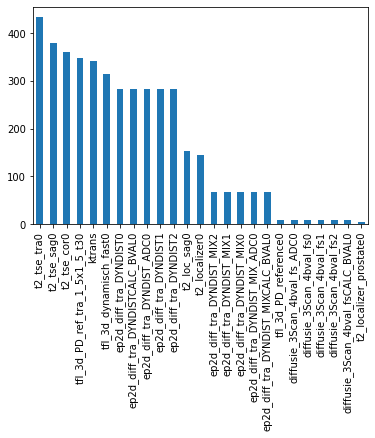

In [ ]:
df_tr_f['name'].value_counts()[:25].T.plot.bar(y='mri_type',rot=90)

In [ ]:
df_types=df_tr_f['name'].value_counts()
len(list(df_types.index))

141

Número de archivos dicom

In [ ]:
df_tr_f[df_tr_f['name']!='ktrans']['proxID'].count()*19

77349

Número de archivos mhd

In [ ]:
df_tr_f[df_tr_f['name']=='ktrans']['proxID'].count()*16

5488

In [ ]:
df_types

,mri_type,count
0,t2_tse_tra0,434
1,t2_tse_sag0,380
2,t2_tse_cor0,361
3,tfl_3d_PD_ref_tra_1_5x1_5_t30,348
4,ktrans,343
5,tfl_3d_dynamisch_fast0,315
6,ep2d_diff_tra_DYNDIST0,283
7,ep2d_diff_tra_DYNDISTCALC_BVAL0,283
8,ep2d_diff_tra_DYNDIST_ADC0,283
9,ep2d_diff_tra_DYNDIST1,283


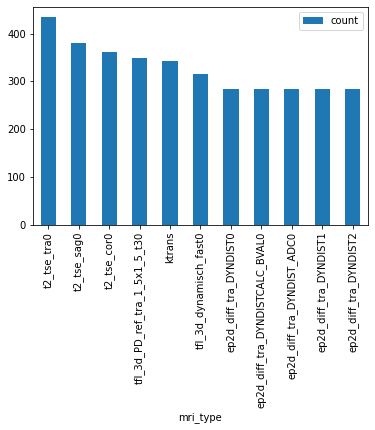

In [ ]:
df_types[:30].plot.bar(x='mri_type',rot=90)

In [ ]:
df_types=df_tr_f['name'].value_counts().reset_index()
df_types=df_types[df_types['name']>=280].rename(columns={'index':'mri_type','name':'count'})
df_types

,mri_type,count
0,t2_tse_tra0,434
1,t2_tse_sag0,380
2,t2_tse_cor0,361
3,tfl_3d_PD_ref_tra_1_5x1_5_t30,348
4,ktrans,343
5,tfl_3d_dynamisch_fast0,315
6,ep2d_diff_tra_DYNDIST0,283
7,ep2d_diff_tra_DYNDISTCALC_BVAL0,283
8,ep2d_diff_tra_DYNDIST_ADC0,283
9,ep2d_diff_tra_DYNDIST1,283


In [ ]:
lst_mri_types=list(df_types['mri_type'])
lst_mri_types

['t2_tse_tra0',
 't2_tse_sag0',
 't2_tse_cor0',
 'tfl_3d_PD_ref_tra_1_5x1_5_t30',
 'ktrans',
 'tfl_3d_dynamisch_fast0',
 'ep2d_diff_tra_DYNDIST0',
 'ep2d_diff_tra_DYNDISTCALC_BVAL0',
 'ep2d_diff_tra_DYNDIST_ADC0',
 'ep2d_diff_tra_DYNDIST1',
 'ep2d_diff_tra_DYNDIST2']

In [ ]:
df_train=df_tr_f[df_tr_f['name'].isin(lst_mri_types)]
df_train=df_train.sort_values(by=['name'])

In [ ]:
df_train.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
2135,ProstateX-0116,1,6,"[16.1963, -4.17941, 25.4894]","[16.1963, -4.17941, 25.4894]","[36, 59, 9]",PZ,ep2d_diff_tra_DYNDIST0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
555,ProstateX-0025,2,6,"[7.79027, 54.6192, -55.072]","[7.79027, 54.6192, -55.072]","[47, 75, 9]",PZ,ep2d_diff_tra_DYNDIST0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
554,ProstateX-0025,2,6,"[7.79027, 54.6192, -55.072]","[7.79027, 54.6192, -55.072]","[47, 75, 9]",PZ,ep2d_diff_tra_DYNDIST0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
553,ProstateX-0025,3,6,"[-8.32488, 41.9199, -51.1366]","[-8.32488, 41.9199, -51.1366]","[39, 69, 9]",TZ,ep2d_diff_tra_DYNDIST0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
2976,ProstateX-0154,3,6,"[-42.3586, 50.6483, 73.0089]","[-42.3586, 50.6483, 73.0089]","[37, 70, 19]",SV,ep2d_diff_tra_DYNDIST0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False


Número de archivos dicom 

In [ ]:
df_train[df_train['name']!='ktrans']['proxID'].count()*19

61807

Número de archivos mhd 

In [ ]:
df_train[df_train['name']=='ktrans']['proxID'].count()*16

5488

In [ ]:
df_train['name'].value_counts()

t2_tse_tra0                        434
t2_tse_sag0                        380
t2_tse_cor0                        361
tfl_3d_PD_ref_tra_1_5x1_5_t30      348
ktrans                             343
tfl_3d_dynamisch_fast0             315
ep2d_diff_tra_DYNDIST0             283
ep2d_diff_tra_DYNDIST1             283
ep2d_diff_tra_DYNDIST2             283
ep2d_diff_tra_DYNDISTCALC_BVAL0    283
ep2d_diff_tra_DYNDIST_ADC0         283
Name: name, dtype: int64

### dicoms

Se realiza ahora la búsqueda de el número de slices para cada tipo de resonancia magnética.

In [ ]:
all_num_slices=[]
for i,mri_type in enumerate(lst_mri_types):
  num_slices=[]
  for path in df_train[df_train['name']==mri_type]['path_dcm']:
    list_aux3=sorted(glob(path+'/*dcm'))
    num_slices.append(len(list_aux3))
  all_num_slices.append(num_slices)

In [ ]:
for i,lst in enumerate(all_num_slices):
  if i ==0:
    print('{:<34} Max  Min    Avrg'.format('mri_type'))
    print('----------------------------------------------------------------------')
  print('{:<35}{}{:^10}{:>4}'.format(lst_mri_types[i],max(lst),min(lst),np.mean(lst)))

mri_type                           Max  Min    Avrg
----------------------------------------------------------------------
t2_tse_tra0                        27    19    20.421658986175114
t2_tse_sag0                        23    19    19.121052631578948
t2_tse_cor0                        25    14    16.656509695290858
tfl_3d_PD_ref_tra_1_5x1_5_t30      16    16    16.0
ktrans                             0    0      0.0
tfl_3d_dynamisch_fast0             12    12    12.0
ep2d_diff_tra_DYNDIST0             75    57    58.25088339222615
ep2d_diff_tra_DYNDISTCALC_BVAL0    25    19    19.41696113074205
ep2d_diff_tra_DYNDIST_ADC0         25    18    19.406360424028268
ep2d_diff_tra_DYNDIST1             75    57    58.25088339222615
ep2d_diff_tra_DYNDIST2             75    57    58.25088339222615


In [ ]:
for i,lst in enumerate(all_num_slices):
  print('\n',lst_mri_types[i],)
  print('------------')
  print(pd.DataFrame(lst).value_counts())


 t2_tse_tra0
------------
19    207
21    162
23     50
25     12
27      2
24      1
dtype: int64

 t2_tse_sag0
------------
19    357
21     20
20      2
23      1
dtype: int64

 t2_tse_cor0
------------
15    169
17    105
19     66
21     16
23      2
14      1
18      1
25      1
dtype: int64

 tfl_3d_PD_ref_tra_1_5x1_5_t30
------------
16    348
dtype: int64

 ktrans
------------
0    343
dtype: int64

 tfl_3d_dynamisch_fast0
------------
12    315
dtype: int64

 ep2d_diff_tra_DYNDIST0
------------
57    237
63     35
69      9
75      2
dtype: int64

 ep2d_diff_tra_DYNDISTCALC_BVAL0
------------
19    237
21     35
23      9
25      2
dtype: int64

 ep2d_diff_tra_DYNDIST_ADC0
------------
19    234
21     35
23      9
18      3
25      2
dtype: int64

 ep2d_diff_tra_DYNDIST1
------------
57    237
63     35
69      9
75      2
dtype: int64

 ep2d_diff_tra_DYNDIST2
------------
57    237
63     35
69      9
75      2
dtype: int64


Como se puede ver, no todas las resonancias de cada paciente posee el mismo número de slices. Ahora buscamos el número más alto de slices presente en cada tipo de resonancia magnética.

In [ ]:
for i,lst in enumerate(all_num_slices):
  df_aux=pd.DataFrame(lst,columns=['slices']).value_counts().reset_index().rename(columns={0:'num'})
  print('\n',lst_mri_types[i],':',df_aux[df_aux['num']==max(df_aux['num'])]['slices'].values[0])
  print(' -', end='')
  for letter in lst_mri_types[i]:
    print('-', end='')


 t2_tse_tra0 : 19
 ------------
 t2_tse_sag0 : 19
 ------------
 t2_tse_cor0 : 15
 ------------
 tfl_3d_PD_ref_tra_1_5x1_5_t30 : 16
 ------------------------------
 ktrans : 0
 -------
 tfl_3d_dynamisch_fast0 : 12
 -----------------------
 ep2d_diff_tra_DYNDIST0 : 57
 -----------------------
 ep2d_diff_tra_DYNDISTCALC_BVAL0 : 19
 --------------------------------
 ep2d_diff_tra_DYNDIST_ADC0 : 19
 ---------------------------
 ep2d_diff_tra_DYNDIST1 : 57
 -----------------------
 ep2d_diff_tra_DYNDIST2 : 57
 -----------------------

Con esta información, se realiza la eliminación de aquellas resonancias magnéticas que no posean el número de slices más común presente en cada tipo. 

MRI_type: t2_tse_tra0 : 19

In [ ]:
num_slices=np.array(all_num_slices[0])

In [ ]:
mask_slices=num_slices==19

In [ ]:
d1=df_train[df_train['name']=='t2_tse_tra0'][mask_slices]

In [ ]:
d1.head(5)

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
311,ProstateX-0019,1,9,"[-4.21012, 42.1916, -40.6457]","[-4.21012, 42.1916, -40.6457]","[182, 236, 10]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
314,ProstateX-0019,1,5,"[-4.21012, 42.1916, -40.6457]","[-4.21012, 42.1916, -40.6457]","[182, 236, 10]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
295,ProstateX-0017,1,5,"[2.89097, 49.4408, -14.4697]","[2.89097, 49.4408, -14.4697]","[202, 233, 9]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
306,ProstateX-0018,1,5,"[4.08917, 18.7769, -11.5951]","[4.08917, 18.7769, -11.5951]","[204, 174, 5]",AS,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
3532,ProstateX-0180,1,4,"[-41.1698, 34.6176, 45.2961]","[-41.1698, 34.6176, 45.2961]","[139, 239, 11]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False


MRI_type: t2_tse_sag0 : 19


In [ ]:
num_slices=np.array(all_num_slices[1])
mask_slices=num_slices==19

In [ ]:
d2=df_train[df_train['name']=='t2_tse_sag0'][mask_slices]

In [ ]:
d2.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
26,ProstateX-0002,1,3,"[-27.0102, 41.5467, -26.0469]","[-27.0102, 41.5467, -26.0469]","[183, 154, 15]",PZ,t2_tse_sag0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
3531,ProstateX-0180,1,3,"[-41.1698, 34.6176, 45.2961]","[-41.1698, 34.6176, 45.2961]","[187, 162, 16]",PZ,t2_tse_sag0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
1450,ProstateX-0079,1,3,"[2.03957, 5.48526, -47.4539]","[2.03957, 5.48526, -47.4539]","[148, 195, 5]",TZ,t2_tse_sag0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
344,ProstateX-0021,4,3,"[38.7099, 28.8409, -28.6634]","[38.7099, 28.8409, -28.6634]","[164, 172, 3]",PZ,t2_tse_sag0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
1771,ProstateX-0096,1,3,"[14.1124, 22.6493, 22.4049]","[14.1124, 22.6493, 22.4049]","[155, 164, 13]",TZ,t2_tse_sag0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False


MRI_type: t2_tse_cor0 : 15


In [ ]:
num_slices=np.array(all_num_slices[2])
mask_slices=num_slices==15

In [ ]:
d3=df_train[df_train['name']=='t2_tse_cor0'][mask_slices]

In [ ]:
d3.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
3458,ProstateX-0177,4,5,"[-5.846966, 8.59326, -23.1375]","[-5.846966, 8.59326, -23.1375]","[158, 189, 4]",AS,t2_tse_cor0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
2380,ProstateX-0129,1,5,"[42.3, 39.7, 20.7]","[42.3, 39.7, 20.7]","[194, 164, 12]",PZ,t2_tse_cor0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
1001,ProstateX-0046,1,4,"[-32.861, -2.20032, 46.9729]","[-32.861, -2.20032, 46.9729]","[109, 151, 9]",PZ,t2_tse_cor0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
3457,ProstateX-0177,2,5,"[-14.6738, 28.1266, -18.9086]","[-14.6738, 28.1266, -18.9086]","[144, 178, 11]",PZ,t2_tse_cor0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
893,ProstateX-0038,3,4,"[-34.7633, 44.767, 14.3969]","[-34.7633, 44.767, 14.3969]","[133, 170, 14]",PZ,t2_tse_cor0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False


MRI_type: tfl_3d_PD_ref_tra_1_5x1_5_t30 : 16


In [ ]:
num_slices=np.array(all_num_slices[3])
mask_slices=num_slices==16

In [ ]:
d4=df_train[df_train['name']=='tfl_3d_PD_ref_tra_1_5x1_5_t30'][mask_slices]

In [ ]:
d4.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
1745,ProstateX-0095,1,10,"[-29.8824, 33.0609, 17.1315]","[-29.8824, 33.0609, 17.1315]","[57, 72, 9]",PZ,tfl_3d_PD_ref_tra_1_5x1_5_t30,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
3855,ProstateX-0192,2,9,"[4.38277, 45.7107, 13.0712]","[4.38277, 45.7107, 13.0712]","[56, 73, 10]",PZ,tfl_3d_PD_ref_tra_1_5x1_5_t30,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
2709,ProstateX-0142,3,9,"[21.5867, 12.2297, 48.2092]","[21.5867, 12.2297, 48.2092]","[59, 50, 10]",AS,tfl_3d_PD_ref_tra_1_5x1_5_t30,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
2143,ProstateX-0117,3,9,"[25.9078, 38.5042, -46.8451]","[25.9078, 38.5042, -46.8451]","[72, 70, 8]",PZ,tfl_3d_PD_ref_tra_1_5x1_5_t30,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
2963,ProstateX-0153,1,9,"[42.0601, 33.9525, 17.631]","[42.0601, 33.9525, 17.631]","[73, 62, 6]",TZ,tfl_3d_PD_ref_tra_1_5x1_5_t30,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False


MRI_type: tfl_3d_dynamisch_fast0 : 12


In [ ]:
num_slices=np.array(all_num_slices[5])
mask_slices=num_slices==12

In [ ]:
d5=df_train[df_train['name']=='tfl_3d_dynamisch_fast0'][mask_slices]

In [ ]:
d5.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
4284,ProstateX-0202,2,41,"[-12.8649, -21.7307, 7.76273]","[-12.8649, -21.7307, 7.76273]","[60, 74, 5]",PZ,tfl_3d_dynamisch_fast0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
4285,ProstateX-0202,2,32,"[-12.8649, -21.7307, 7.76273]","[-12.8649, -21.7307, 7.76273]","[60, 74, 5]",PZ,tfl_3d_dynamisch_fast0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
4286,ProstateX-0202,2,30,"[-12.8649, -21.7307, 7.76273]","[-12.8649, -21.7307, 7.76273]","[60, 74, 5]",PZ,tfl_3d_dynamisch_fast0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
4287,ProstateX-0202,1,30,"[-0.02085, -44.5506, 16.7349]","[-0.02085, -44.5506, 16.7349]","[67, 61, 6]",AS,tfl_3d_dynamisch_fast0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
4305,ProstateX-0202,1,19,"[-0.02085, -44.5506, 16.7349]","[-0.02085, -44.5506, 16.7349]","[67, 61, 6]",AS,tfl_3d_dynamisch_fast0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True


MRI_type: ep2d_diff_tra_DYNDIST0 : 57

In [ ]:
num_slices=np.array(all_num_slices[6])
mask_slices=num_slices==57

In [ ]:
d6=df_train[df_train['name']=='ep2d_diff_tra_DYNDIST0'][mask_slices]

In [ ]:
d6.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
2135,ProstateX-0116,1,6,"[16.1963, -4.17941, 25.4894]","[16.1963, -4.17941, 25.4894]","[36, 59, 9]",PZ,ep2d_diff_tra_DYNDIST0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
555,ProstateX-0025,2,6,"[7.79027, 54.6192, -55.072]","[7.79027, 54.6192, -55.072]","[47, 75, 9]",PZ,ep2d_diff_tra_DYNDIST0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
554,ProstateX-0025,2,6,"[7.79027, 54.6192, -55.072]","[7.79027, 54.6192, -55.072]","[47, 75, 9]",PZ,ep2d_diff_tra_DYNDIST0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
553,ProstateX-0025,3,6,"[-8.32488, 41.9199, -51.1366]","[-8.32488, 41.9199, -51.1366]","[39, 69, 9]",TZ,ep2d_diff_tra_DYNDIST0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
2976,ProstateX-0154,3,6,"[-42.3586, 50.6483, 73.0089]","[-42.3586, 50.6483, 73.0089]","[37, 70, 19]",SV,ep2d_diff_tra_DYNDIST0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False


MRI_type: ep2d_diff_tra_DYNDISTCALC_BVAL0 : 19


In [ ]:
num_slices=np.array(all_num_slices[7])
mask_slices=num_slices==19

In [ ]:
d7=df_train[df_train['name']=='ep2d_diff_tra_DYNDISTCALC_BVAL0'][mask_slices]

In [ ]:
d7.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
1173,ProstateX-0059,1,9,"[-26.9082, 24.1523, 14.1477]","[-26.9082, 24.1523, 14.1477]","[31, 72, 11]",PZ,ep2d_diff_tra_DYNDISTCALC_BVAL0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
2241,ProstateX-0121,1,8,"[6.99026622772217, 6.90991668701172, 12.854620...","[6.99026622772217, 6.90991668701172, 12.854620...","[38, 58, 8]",AS,ep2d_diff_tra_DYNDISTCALC_BVAL0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
1375,ProstateX-0072,1,9,"[-46.3727, 5.99356, 32.8262]","[-46.3727, 5.99356, 32.8262]","[36, 61, 9]",TZ,ep2d_diff_tra_DYNDISTCALC_BVAL0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
1384,ProstateX-0073,1,8,"[27.3235, 35.823, -40.3352]","[27.3235, 35.823, -40.3352]","[49, 74, 6]",PZ,ep2d_diff_tra_DYNDISTCALC_BVAL0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
1775,ProstateX-0096,1,8,"[14.1124, 22.6493, 22.4049]","[14.1124, 22.6493, 22.4049]","[35, 63, 7]",TZ,ep2d_diff_tra_DYNDISTCALC_BVAL0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False


MRI_type: ep2d_diff_tra_DYNDIST_ADC0 : 19


In [ ]:
num_slices=np.array(all_num_slices[8])
mask_slices=num_slices==19

In [ ]:
d8=df_train[df_train['name']=='ep2d_diff_tra_DYNDIST_ADC0'][mask_slices]

In [ ]:
d8.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
3597,ProstateX-0185,1,7,"[-36.5467, 15.7218, 22.3888]","[-36.5467, 15.7218, 22.3888]","[48, 65, 10]",TZ,ep2d_diff_tra_DYNDIST_ADC0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
3641,ProstateX-0187,1,7,"[15.6411, 12.9549, -36.1184]","[15.6411, 12.9549, -36.1184]","[44, 59, 6]",AS,ep2d_diff_tra_DYNDIST_ADC0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
3640,ProstateX-0187,4,7,"[28.2186, 12.6441, -8.76523]","[28.2186, 12.6441, -8.76523]","[51, 60, 15]",AS,ep2d_diff_tra_DYNDIST_ADC0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
3959,ProstateX-0196,2,7,"[35.2755, 27.3587, -8.26241]","[35.2755, 27.3587, -8.26241]","[67, 63, 4]",PZ,ep2d_diff_tra_DYNDIST_ADC0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
3642,ProstateX-0187,2,7,"[9.00901, 8.66353, -21.6164]","[9.00901, 8.66353, -21.6164]","[41, 57, 11]",TZ,ep2d_diff_tra_DYNDIST_ADC0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False


MRI_type: ep2d_diff_tra_DYNDIST1 : 57

In [ ]:
num_slices=np.array(all_num_slices[9])
mask_slices=num_slices==57

In [ ]:
d9=df_train[df_train['name']=='ep2d_diff_tra_DYNDIST1'][mask_slices]

In [ ]:
d9.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
188,ProstateX-0009,1,6,"[19.565, 32.8037, -37.4421]","[19.565, 32.8037, -37.4421]","[44, 64, 13]",TZ,ep2d_diff_tra_DYNDIST1,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
1274,ProstateX-0067,1,6,"[18.6239, 25.4505, 14.9875]","[18.6239, 25.4505, 14.9875]","[45, 60, 8]",PZ,ep2d_diff_tra_DYNDIST1,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
208,ProstateX-0011,1,7,"[9.29795, 10.7009, 14.2935]","[9.29795, 10.7009, 14.2935]","[49, 66, 8]",PZ,ep2d_diff_tra_DYNDIST1,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
539,ProstateX-0025,1,6,"[23.6983, 51.83, -55.7923]","[34.8707, 51.5015, -3.06943]","[45, 82, -8]",PZ,ep2d_diff_tra_DYNDIST1,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
1460,ProstateX-0079,1,7,"[2.03957, 5.48526, -47.4539]","[2.03957, 5.48526, -47.4539]","[49, 64, 3]",TZ,ep2d_diff_tra_DYNDIST1,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False


MRI_type: ep2d_diff_tra_DYNDIST2 : 57

In [ ]:
num_slices=np.array([])
num_slices=np.array(all_num_slices[10])
mask_slices=num_slices==57

In [ ]:
d10=df_train[df_train['name']=='ep2d_diff_tra_DYNDIST2'][mask_slices]

In [ ]:
d10.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
2716,ProstateX-0142,1,6,"[32.1001, 22.5752, 25.9394]","[32.1001, 22.5752, 25.9394]","[44, 60, 6]",TZ,ep2d_diff_tra_DYNDIST2,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
2063,ProstateX-0111,1,6,"[-24.6808, 5.65637, -33.5395]","[-24.6808, 5.65637, -33.5395]","[38, 53, 10]",AS,ep2d_diff_tra_DYNDIST2,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
788,ProstateX-0033,3,6,"[24.7403, 33.959, 34.6019]","[24.7403, 33.959, 34.6019]","[48, 68, 7]",TZ,ep2d_diff_tra_DYNDIST2,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
3864,ProstateX-0192,2,6,"[4.38277, 45.7107, 13.0712]","[4.38277, 45.7107, 13.0712]","[54, 71, 12]",PZ,ep2d_diff_tra_DYNDIST2,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
787,ProstateX-0033,1,6,"[-0.473669, 43.2903, 35.9394]","[-0.473669, 43.2903, 35.9394]","[35, 72, 8]",PZ,ep2d_diff_tra_DYNDIST2,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False


### ktrans

Preparación para entrenar el modelo unimodalmente únicamente con el tipo de resonancia magnética: __ktrans__

In [ ]:
df_train_mhd=df_train[df_train['name']=='ktrans']
df_train_mhd.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
858,ProstateX-0037,2,188,"[11.742, 38.1655, 0.0225723]","[11.742, 38.1655, 0.0225723]","[56, 74, 6]",PZ,ktrans,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
838,ProstateX-0036,1,188,"[41.2459, 52.7925, -62.1916]","[41.2459, 52.7925, -62.1916]","[77, 75, 7]",PZ,ktrans,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
2664,ProstateX-0140,1,188,"[-12.396, 24.3574, -39.5583]","[-12.396, 24.3574, -39.5583]","[47, 70, 7]",PZ,ktrans,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
3851,ProstateX-0191,1,188,"[20.7818, 18.0177, -0.799461]","[20.7818, 18.0177, -0.799461]","[92, 83, 9]",AS,ktrans,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
2495,ProstateX-0134,2,188,"[24.5865, 41.3689, -11.8297]","[24.5865, 41.3689, -11.8297]","[73, 68, 9]",TZ,ktrans,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False


In [ ]:
num_slices=[]
for path_mhd in df_train_mhd['path_dcm']:
  itkimage = sitk.ReadImage(path_mhd)
  ct_scan = sitk.GetArrayFromImage(itkimage)
  num_slices.append(ct_scan.shape[0])

In [ ]:
print('{:<9} Max  Min    Avrg'.format('mri_type'))
print('-----------------------------------------')
print('{:<10}{}{:^10}{:>4}'.format(lst_mri_types[4],max(num_slices),min(num_slices),np.mean(num_slices)))

mri_type  Max  Min    Avrg
-----------------------------------------
ktrans    20    12    15.906705539358601


In [ ]:
print(lst_mri_types[4],)
print('------------')
print(pd.DataFrame(num_slices).value_counts())

ktrans
------------
16    333
12      9
20      1
dtype: int64


In [ ]:
df_aux=pd.DataFrame(num_slices,columns=['slices']).value_counts().reset_index().rename(columns={0:'num'})
print('\n',lst_mri_types[i],':',df_aux[df_aux['num']==max(df_aux['num'])]['slices'].values[0])
print(' -', end='')
for letter in lst_mri_types[i]:
  print('-', end='')


 ep2d_diff_tra_DYNDIST2 : 16
 -----------------------

In [ ]:
num_slices=np.array(num_slices)

In [ ]:
mask_slices=num_slices==16

In [ ]:
d11=df_train_mhd[mask_slices]

In [ ]:
d11.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
858,ProstateX-0037,2,188,"[11.742, 38.1655, 0.0225723]","[11.742, 38.1655, 0.0225723]","[56, 74, 6]",PZ,ktrans,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
838,ProstateX-0036,1,188,"[41.2459, 52.7925, -62.1916]","[41.2459, 52.7925, -62.1916]","[77, 75, 7]",PZ,ktrans,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
2664,ProstateX-0140,1,188,"[-12.396, 24.3574, -39.5583]","[-12.396, 24.3574, -39.5583]","[47, 70, 7]",PZ,ktrans,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
2495,ProstateX-0134,2,188,"[24.5865, 41.3689, -11.8297]","[24.5865, 41.3689, -11.8297]","[73, 68, 9]",TZ,ktrans,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
940,ProstateX-0041,1,188,"[-11.24582, 60.9975, -48.0648]","[-11.24582, 60.9975, -48.0648]","[50, 79, 5]",PZ,ktrans,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True


Ahora se concatenan todos los dataframes filtrados en los pasos anteriores.

In [ ]:
df_final_train=pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11])
df_final_train.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
311,ProstateX-0019,1,9,"[-4.21012, 42.1916, -40.6457]","[-4.21012, 42.1916, -40.6457]","[182, 236, 10]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
314,ProstateX-0019,1,5,"[-4.21012, 42.1916, -40.6457]","[-4.21012, 42.1916, -40.6457]","[182, 236, 10]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
295,ProstateX-0017,1,5,"[2.89097, 49.4408, -14.4697]","[2.89097, 49.4408, -14.4697]","[202, 233, 9]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False
306,ProstateX-0018,1,5,"[4.08917, 18.7769, -11.5951]","[4.08917, 18.7769, -11.5951]","[204, 174, 5]",AS,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,True
3532,ProstateX-0180,1,4,"[-41.1698, 34.6176, 45.2961]","[-41.1698, 34.6176, 45.2961]","[139, 239, 11]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,False


In [ ]:
df_final_train['name'].value_counts()

t2_tse_sag0                        357
tfl_3d_PD_ref_tra_1_5x1_5_t30      348
ktrans                             333
tfl_3d_dynamisch_fast0             315
ep2d_diff_tra_DYNDIST0             237
ep2d_diff_tra_DYNDISTCALC_BVAL0    237
ep2d_diff_tra_DYNDIST1             237
ep2d_diff_tra_DYNDIST2             237
ep2d_diff_tra_DYNDIST_ADC0         234
t2_tse_tra0                        207
t2_tse_cor0                        169
Name: name, dtype: int64

In [ ]:
df_final_train['name'].value_counts().sum()

2911

el siguiente dataframe contiene solo las observaciones con un mismo número de slices

In [ ]:
df_final_train.shape

(2911, 10)

In [ ]:
all_num_slices=[]
for i,mri_type in enumerate(list(df_types['mri_type'])):
  num_slices=[]
  for path in df_final_train[df_final_train['name']==mri_type]['path_dcm']:
    list_aux3=sorted(glob(path+'/*'))
    num_slices.append(len(list_aux3))
  all_num_slices.append(num_slices)

In [ ]:
len(all_num_slices)

11

In [ ]:
for lst in all_num_slices:
  try:
    print(max(lst),min(lst),np.mean(lst))
  except:
    print(lst)

19 19 19.0
19 19 19.0
15 15 15.0
16 16 16.0
0 0 0.0
12 12 12.0
57 57 57.0
19 19 19.0
19 19 19.0
57 57 57.0
57 57 57.0


In [ ]:
for lst in all_num_slices:
  print(pd.DataFrame(lst).value_counts())

19    207
dtype: int64
19    357
dtype: int64
15    169
dtype: int64
16    348
dtype: int64
0    333
dtype: int64
12    315
dtype: int64
57    237
dtype: int64
19    237
dtype: int64
19    234
dtype: int64
57    237
dtype: int64
57    237
dtype: int64


In [ ]:
df_tr_f=df_final_train.assign(clinSig=lambda dataset:dataset['clinSig'].apply(lambda row:1 if row==True else 0))

In [ ]:
df_tr_f.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
311,ProstateX-0019,1,9,"[-4.21012, 42.1916, -40.6457]","[-4.21012, 42.1916, -40.6457]","[182, 236, 10]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,1
314,ProstateX-0019,1,5,"[-4.21012, 42.1916, -40.6457]","[-4.21012, 42.1916, -40.6457]","[182, 236, 10]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,1
295,ProstateX-0017,1,5,"[2.89097, 49.4408, -14.4697]","[2.89097, 49.4408, -14.4697]","[202, 233, 9]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,0
306,ProstateX-0018,1,5,"[4.08917, 18.7769, -11.5951]","[4.08917, 18.7769, -11.5951]","[204, 174, 5]",AS,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,1
3532,ProstateX-0180,1,4,"[-41.1698, 34.6176, 45.2961]","[-41.1698, 34.6176, 45.2961]","[139, 239, 11]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,0


# Exploración del dataset

In [ ]:
df_tr_f.head()

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
311,ProstateX-0019,1,9,"[-4.21012, 42.1916, -40.6457]","[-4.21012, 42.1916, -40.6457]","[182, 236, 10]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,1
314,ProstateX-0019,1,5,"[-4.21012, 42.1916, -40.6457]","[-4.21012, 42.1916, -40.6457]","[182, 236, 10]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,1
295,ProstateX-0017,1,5,"[2.89097, 49.4408, -14.4697]","[2.89097, 49.4408, -14.4697]","[202, 233, 9]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,0
306,ProstateX-0018,1,5,"[4.08917, 18.7769, -11.5951]","[4.08917, 18.7769, -11.5951]","[204, 174, 5]",AS,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,1
3532,ProstateX-0180,1,4,"[-41.1698, 34.6176, 45.2961]","[-41.1698, 34.6176, 45.2961]","[139, 239, 11]",PZ,t2_tse_tra0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,0


Cuantos pacientes tienen algún tipo de hallazgo

In [ ]:
df_tr_f.groupby(by='proxID')['fid'].value_counts()[:15]

proxID          fid
ProstateX-0000  1      10
ProstateX-0001  1       6
ProstateX-0002  1      10
                2      10
ProstateX-0003  1       8
                2       8
ProstateX-0004  1       4
ProstateX-0005  1      20
                0       5
ProstateX-0006  1      10
                2      10
ProstateX-0007  1       9
ProstateX-0008  1      10
ProstateX-0009  1       8
ProstateX-0010  1      11
Name: fid, dtype: int64

Ahora podemos ver el número de resonancias magnéticas que presentan o no 

In [ ]:
df_tr_f[df_tr_f['clinSig']==1].groupby(by='proxID')['clinSig'].value_counts()

proxID          clinSig
ProstateX-0000  1          10
ProstateX-0002  1          10
ProstateX-0005  1          15
ProstateX-0014  1           5
ProstateX-0015  1           4
                           ..
ProstateX-0199  1          74
ProstateX-0200  1          35
ProstateX-0201  1          36
ProstateX-0202  1          37
ProstateX-0203  1          78
Name: clinSig, Length: 70, dtype: int64

Debido a que se ha observado que no todos los pacientes poseen el mísmo número de tipos de resonancia magnética, se procede a calcular el número real existente de tipos de resonancia magnética. Se muestra por pantalla los 10 valores con mayor presencia en el dataset.

In [ ]:
df_tr_f['name'].value_counts()

t2_tse_sag0                        357
tfl_3d_PD_ref_tra_1_5x1_5_t30      348
ktrans                             333
tfl_3d_dynamisch_fast0             315
ep2d_diff_tra_DYNDIST0             237
ep2d_diff_tra_DYNDISTCALC_BVAL0    237
ep2d_diff_tra_DYNDIST1             237
ep2d_diff_tra_DYNDIST2             237
ep2d_diff_tra_DYNDIST_ADC0         234
t2_tse_tra0                        207
t2_tse_cor0                        169
Name: name, dtype: int64

In [ ]:
sum(list(df_tr_f.groupby('proxID')['fid'].count()))

2911

In [ ]:
df_tr_f[df_tr_f['clinSig']==1].groupby(by='proxID').count()

,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
proxID,,,,,,,,,
ProstateX-0000,10,10,10,10,10,10,10,10,10
ProstateX-0002,10,10,10,10,10,10,10,10,10
ProstateX-0005,15,15,15,15,15,15,15,15,15
ProstateX-0014,5,5,5,5,5,5,5,5,5
ProstateX-0015,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...
ProstateX-0199,74,74,74,74,74,74,74,74,74
ProstateX-0200,35,35,35,35,35,35,35,35,35
ProstateX-0201,36,36,36,36,36,36,36,36,36


Número de pacientes 

In [ ]:
len(list(df_tr_f.groupby('proxID').count().index))

203

Número de pacientes con algún tipo de hallazgo positivo

In [ ]:
list_1=list(df_tr_f[df_tr_f['clinSig']==1].groupby(by='proxID').count().index)
len(list_1)

70

Número de pacientes con ningún tipo de hallazgo positivo

In [ ]:
query_np=df_tr_f[df_tr_f['clinSig']==0].groupby(by='proxID').count()
query_np[list(~query_np.reset_index()['proxID'].isin(list_1))]['clinSig'].count()

133

Para comprobar la corrrecta organización de los datos, a modo de ejemplo, se realiza la búsqueda de el hallazgo 'fid' = 1 del paciente 3

In [ ]:
query_p3=df_tr_f[(df_tr_f['proxID']=='ProstateX-0003') & (df_tr_f['fid']==1)]
query_p3

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
54,ProstateX-0003,1,2,"[22.1495, 31.2717, -2.45933]","[22.1495, 31.2717, -2.45933]","[168, 165, 3]",TZ,t2_tse_sag0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,0
55,ProstateX-0003,1,8,"[22.1495, 31.2717, -2.45933]","[22.1495, 31.2717, -2.45933]","[80, 69, 10]",TZ,tfl_3d_PD_ref_tra_1_5x1_5_t30,/content/drive/MyDrive/Capstone/PROSTATEX_data...,0
66,ProstateX-0003,1,5,"[22.1495, 31.2717, -2.45933]","[22.1495, 31.2717, -2.45933]","[54, 68, 11]",TZ,ep2d_diff_tra_DYNDIST0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,0
60,ProstateX-0003,1,7,"[22.1495, 31.2717, -2.45933]","[22.1495, 31.2717, -2.45933]","[54, 68, 11]",TZ,ep2d_diff_tra_DYNDISTCALC_BVAL0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,0
68,ProstateX-0003,1,6,"[22.1495, 31.2717, -2.45933]","[22.1495, 31.2717, -2.45933]","[54, 68, 11]",TZ,ep2d_diff_tra_DYNDIST_ADC0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,0
64,ProstateX-0003,1,5,"[22.1495, 31.2717, -2.45933]","[22.1495, 31.2717, -2.45933]","[54, 68, 11]",TZ,ep2d_diff_tra_DYNDIST1,/content/drive/MyDrive/Capstone/PROSTATEX_data...,0
62,ProstateX-0003,1,5,"[22.1495, 31.2717, -2.45933]","[22.1495, 31.2717, -2.45933]","[54, 68, 11]",TZ,ep2d_diff_tra_DYNDIST2,/content/drive/MyDrive/Capstone/PROSTATEX_data...,0
51,ProstateX-0003,1,188,"[22.1495, 31.2717, -2.45933]","[22.1495, 31.2717, -2.45933]","[80, 69, 10]",TZ,ktrans,/content/drive/MyDrive/Capstone/PROSTATEX_data...,0


Como se puede ver, el paciente 3 presenta 11 tipos diferentes de resonancias magnéticas. A continuación se lee la información contenida dentro del directorio de dos de estas resonancias magnéticas.

## Ktrans

Se quiere conocer la serie ktrans

In [ ]:
query_ktrans_p3=query_p3[query_p3['name']=='ktrans']
query_ktrans_p3

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
51,ProstateX-0003,1,188,"[22.1495, 31.2717, -2.45933]","[22.1495, 31.2717, -2.45933]","[80, 69, 10]",TZ,ktrans,/content/drive/MyDrive/Capstone/PROSTATEX_data...,0


Slice del hallazgo

In [ ]:
slice_k=query_ktrans_p3['ijk'].values[0][2]

In [ ]:
itkimage = sitk.ReadImage(query_ktrans_p3['path_dcm'].values[0])

In [ ]:
# Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
ct_scan = sitk.GetArrayFromImage(itkimage)

# Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
origin = np.array(list(reversed(itkimage.GetOrigin())))

# Read the spacing along each dimension
spacing = np.array(list(reversed(itkimage.GetSpacing())))

In [ ]:
ct_scan.shape

(16, 128, 128)

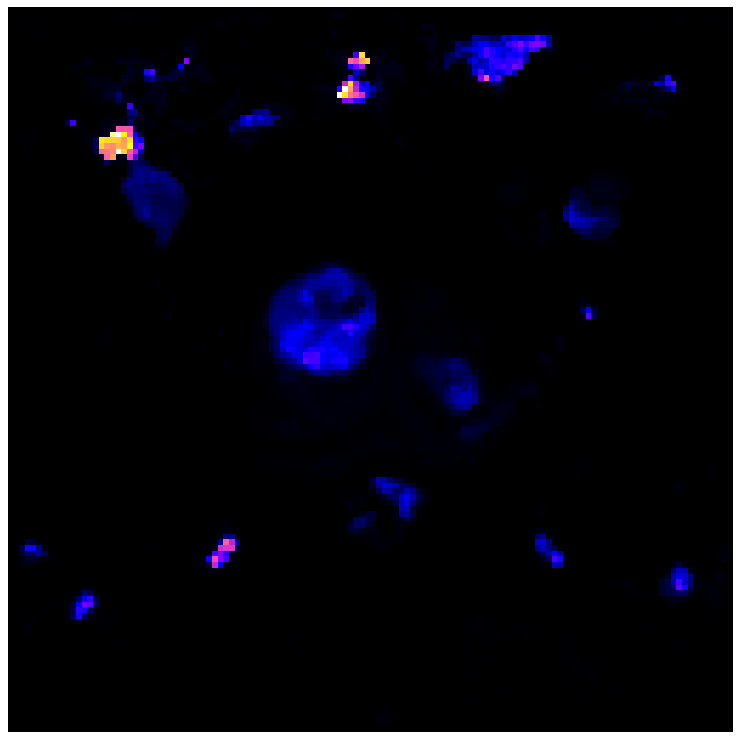

In [ ]:
plt.figure(figsize=(18, 12), dpi=80)
plt.imshow(ct_scan[slice_k],cmap='gnuplot2')
plt.axis("off")
plt.show()

Todos los slices

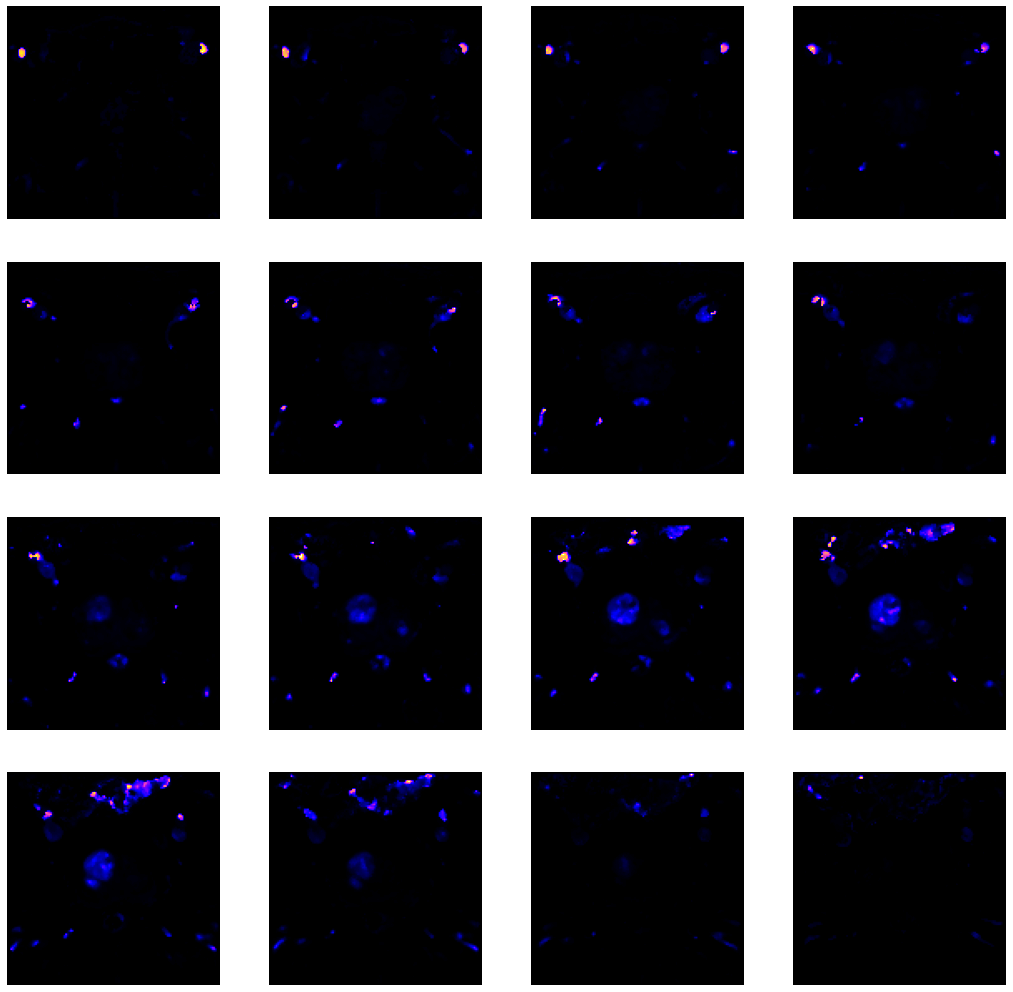

In [ ]:
num_plots=int(np.sqrt(ct_scan.shape[0]))
fig, ax = plt.subplots(num_plots,num_plots,figsize=(18, 18))
cont=0

for i in range(0,num_plots):
  for k in range(0,num_plots):
    ax[i,k].imshow(ct_scan[cont],cmap='gnuplot2')
    ax[i,k].axis("off")
    cont+=1

## Dicom

In [ ]:
query_adc_p3=query_p3[query_p3['name']=='ep2d_diff_tra_DYNDIST_ADC0']
query_adc_p3

,proxID,fid,dcmSerNum,pos_x,pos_y,ijk,zone,name,path_dcm,clinSig
68,ProstateX-0003,1,6,"[22.1495, 31.2717, -2.45933]","[22.1495, 31.2717, -2.45933]","[54, 68, 11]",TZ,ep2d_diff_tra_DYNDIST_ADC0,/content/drive/MyDrive/Capstone/PROSTATEX_data...,0


In [ ]:
slice_k=query_ktrans_p3['ijk'].values[0][2]

In [ ]:
query_adc_p3['path_dcm'].values[0]

'/content/drive/MyDrive/Capstone/PROSTATEX_dataset/manifest-A3Y4AE4o5818678569166032044/PROSTATEx/ProstateX-0003/10-17-2011-NA-MC prostaat kliniek detectie-mc MCPROSKL30-03010/6.000000-ep2ddifftraDYNDISTADC-83547'

In [ ]:
dcms_p3=sorted(glob(query_adc_p3['path_dcm'].values[0]+'/*.dcm'))

In [ ]:
dataset=dicom.read_file(dcms_p3[slice_k])

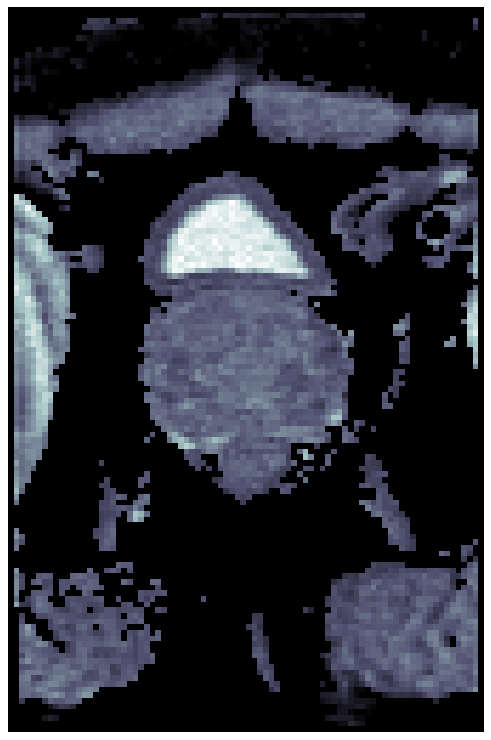

In [ ]:
plt.figure(figsize=(18, 12), dpi=80)
plt.imshow(dataset.pixel_array,plt.cm.bone)
plt.axis("off")
plt.show()

Todos los slices

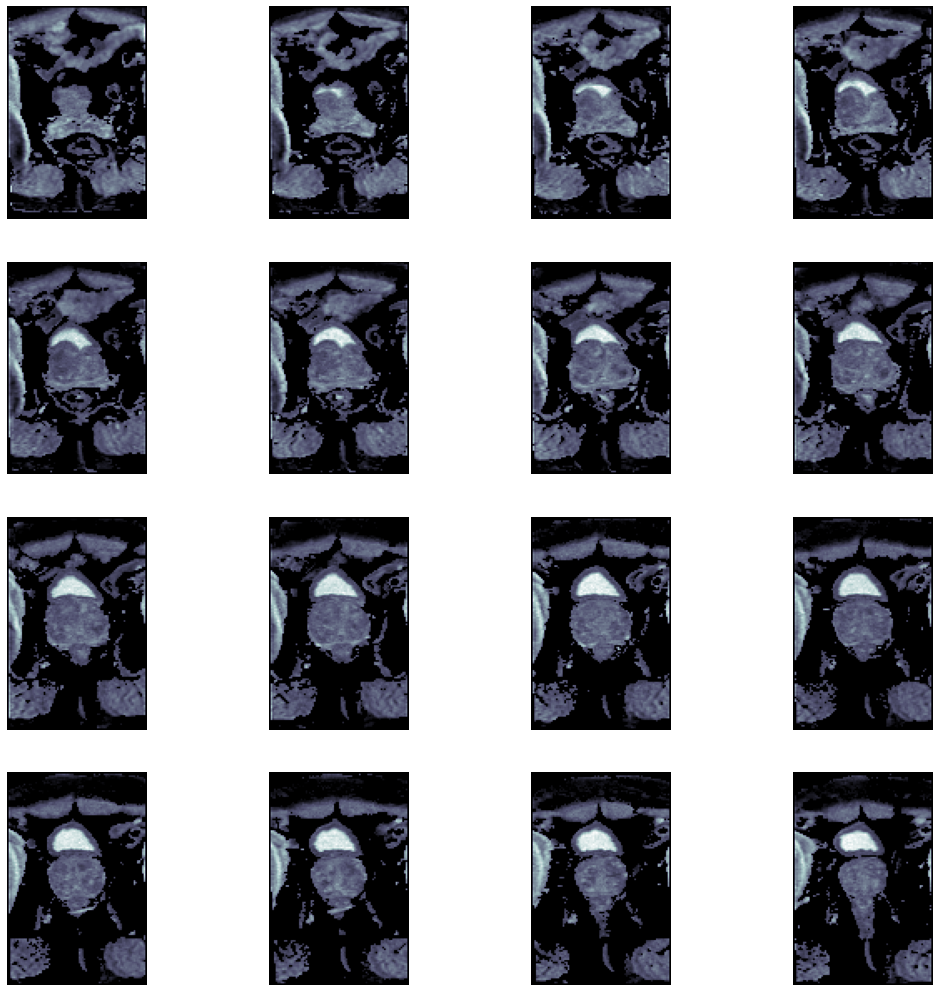

In [ ]:
num_plots=int(np.sqrt(len(dcms_p3)))
fig, ax = plt.subplots(num_plots,num_plots,figsize=(18, 18))
cont=0

for i in range(0,num_plots):
  for k in range(0,num_plots):
    ax[i,k].imshow(dicom.read_file(dcms_p3[cont]).pixel_array,plt.cm.bone)
    ax[i,k].axis("off")
    cont+=1

## Exportar dataset limpio

In [ ]:
path_pickle='/content/drive/MyDrive/Capstone/PROSTATEX_dataset/pickles/'
pickle_out=open(path_pickle+"df_training.pickle","wb")
pickle.dump(df_tr_f,pickle_out)
pickle_out.close()